In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Daten einlesen und Spalten verstehen

In [181]:
df = pd.read_csv('../data/immo_data_202208_v2.csv', low_memory=False)
df.head()

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,Floor,detail_responsive#municipality,detail_responsive#surface_living,detail_responsive#floor,detail_responsive#available_from,Gemeinde,Wohnfläche,Stockwerk,Nutzfläche,Verfügbarkeit,Grundstücksfläche,detail_responsive#surface_property,detail_responsive#surface_usable,Commune,Surface habitable,Surface du terrain,Surface utile,Disponibilité,Étage,Comune,Superficie abitabile,Disponibilità,Gross return,Piano,Superficie del terreno,Superficie utile,Municipality_merged,Floor_merged,Living_space_merged,Floor_space_merged,Plot_area_merged,Availability_merged,location_parsed,title,details,address,price,link,details_structured,lat,lon,index,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Locality,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,NoisePollutionRoadM,NoisePollutionRoadS,PopulationDensityL,PopulationDensityM,PopulationDensityS,RiversAndLakesL,RiversAndLakesM,RiversAndLakesS,WorkplaceDensityL,WorkplaceDensityM,WorkplaceDensityS,Zip,distanceToTrainStation,gde_area_agriculture_percentage,gde_area_forest_percentage,gde_area_nonproductive_percentage,gde_area_settlement_percentage,gde_average_house_hold,gde_empty_apartments,gde_foreigners_percentage,gde_new_homes_per_1000,gde_politics_bdp,gde_politics_cvp,gde_politics_evp,gde_politics_fdp,gde_politics_glp,gde_politics_gps,gde_politics_pda,gde_politics_rights,gde_politics_sp,gde_politics_svp,gde_pop_per_km2,gde_population,gde_private_apartments,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,price_cleaned,type,Space extracted,rooms,plz_parsed,type_unified,Floor_unified,Plot_area_unified,Living_area_unified,provider,space,price_s,address_s,No. of rooms:,Number of apartments:,Surface living:,Land area:,Room height:,Last refurbishment:,Year built:,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,0,0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,4. floor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biberstein,4. floor,100 m²,NaN,NaN,On request,Strasse: plz:5023 Stadt: Biberstein Kanton: AG,Luxuriöse Attika-Wohnung mit herrlicher Aussicht,"3.5 rooms, 100 m²,","5023 Biberstein, AG","CHF 1,150,000.—",/en/d/penthouse-buy-biberstein/7255200,"{'Municipality': 'Biberstein', 'Living space':...",47.417100,8.085600,16620,0.511176,0.286451,0.090908,47.415927,Biberstein,8.085840,0.0,0.0,0.0,0.058298,0.067048,0.103850,0.092914,0.209530,0.366674,0.082170,0.001811,0.011871,0.030169,0.052120,0.098951,5023,3.038467,30.676329,51.449275,4.589372,13.285024,2.23,1.994681,9.255663,4.739336,5.873715,4.579662,3.359031,18.355360,6.057269,7.066814,NaN,0.220264,20.392805,30.809471,376.829268,1545.0,686.0,2.234259,5.89,14.0,9.0,308.0,331.0,1150000.0,penthouse,100.0,5.0,5023.0,penthouse,4,NaN,100.0,Immoscout24.ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,1,1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biberstein,NaN,156 m²,242 m²,222 m²,On request,Strasse:Buhldenstrasse 8d plz:5023 Stadt: Bib...,"Stilvolle Liegenschaft - ruhige Lage, unverbau...","4.5 rooms, 156 m²,","Buhldenstrasse 8d, 5023 Biberstein, AG","CHF 1,420,000.—",/en

In [182]:
# remove first 2 columns
df = df.iloc[:, 2:]

print(df.shape)

# print all columns, so we can see all columns
pd.set_option('display.max_columns', None)

df.head()

(22481, 132)


,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,Floor,detail_responsive#municipality,detail_responsive#surface_living,detail_responsive#floor,detail_responsive#available_from,Gemeinde,Wohnfläche,Stockwerk,Nutzfläche,Verfügbarkeit,Grundstücksfläche,detail_responsive#surface_property,detail_responsive#surface_usable,Commune,Surface habitable,Surface du terrain,Surface utile,Disponibilité,Étage,Comune,Superficie abitabile,Disponibilità,Gross return,Piano,Superficie del terreno,Superficie utile,Municipality_merged,Floor_merged,Living_space_merged,Floor_space_merged,Plot_area_merged,Availability_merged,location_parsed,title,details,address,price,link,details_structured,lat,lon,index,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Locality,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,NoisePollutionRoadM,NoisePollutionRoadS,PopulationDensityL,PopulationDensityM,PopulationDensityS,RiversAndLakesL,RiversAndLakesM,RiversAndLakesS,WorkplaceDensityL,WorkplaceDensityM,WorkplaceDensityS,Zip,distanceToTrainStation,gde_area_agriculture_percentage,gde_area_forest_percentage,gde_area_nonproductive_percentage,gde_area_settlement_percentage,gde_average_house_hold,gde_empty_apartments,gde_foreigners_percentage,gde_new_homes_per_1000,gde_politics_bdp,gde_politics_cvp,gde_politics_evp,gde_politics_fdp,gde_politics_glp,gde_politics_gps,gde_politics_pda,gde_politics_rights,gde_politics_sp,gde_politics_svp,gde_pop_per_km2,gde_population,gde_private_apartments,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,price_cleaned,type,Space extracted,rooms,plz_parsed,type_unified,Floor_unified,Plot_area_unified,Living_area_unified,provider,space,price_s,address_s,No. of rooms:,Number of apartments:,Surface living:,Land area:,Room height:,Last refurbishment:,Year built:,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,4. floor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biberstein,4. floor,100 m²,NaN,NaN,On request,Strasse: plz:5023 Stadt: Biberstein Kanton: AG,Luxuriöse Attika-Wohnung mit herrlicher Aussicht,"3.5 rooms, 100 m²,","5023 Biberstein, AG","CHF 1,150,000.—",/en/d/penthouse-buy-biberstein/7255200,"{'Municipality': 'Biberstein', 'Living space':...",47.417100,8.085600,16620,0.511176,0.286451,0.090908,47.415927,Biberstein,8.085840,0.0,0.0,0.0,0.058298,0.067048,0.103850,0.092914,0.209530,0.366674,0.082170,0.001811,0.011871,0.030169,0.052120,0.098951,5023,3.038467,30.676329,51.449275,4.589372,13.285024,2.23,1.994681,9.255663,4.739336,5.873715,4.579662,3.359031,18.355360,6.057269,7.066814,NaN,0.220264,20.392805,30.809471,376.829268,1545.0,686.0,2.234259,5.89,14.0,9.0,308.0,331.0,1150000.0,penthouse,100.0,5.0,5023.0,penthouse,4,NaN,100.0,Immoscout24.ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biberstein,NaN,156 m²,242 m²,222 m²,On request,Strasse:Buhldenstrasse 8d plz:5023 Stadt: Bib...,"Stilvolle Liegenschaft - ruhige Lage, unverbau...","4.5 rooms, 156 m²,","Buhldenstrasse 8d, 5023 Biberstein, AG","CHF 1,420,000.—",/en/d/terrace-house-buy-biberstein/

Was bedeuten L, M, S? z.B. ForestDensityL	ForestDensityM	ForestDensityS

In [183]:
print(df['details_structured'][0])

{'Municipality': 'Biberstein', 'Living space': '100 m²', 'Floor': '4. floor', 'Availability': 'On request', 'location': '5023 Biberstein, AG', 'description': '3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit herrlicher Aussicht»CHF 1,150,000.—Favourite', 'detailed_description': 'DescriptionLuxuriöse Attika-Wohnung direkt an der Aare und angrenzend an die Landwirtschaftszone, mit unverbaubarer Weitsicht, grosszügiger Garage und Option auf ein zusätzliches Zimmer.Einzigartige Lage, top Aussicht und hochwertige Innenausstattung? Das alles bietet diese charmante Eigentumswohnung auf 100m2 im steuergünstigen Biberstein. Stadtnah gelegen und mit direktem Naturzugang sorgt sie für ein rundum angenehmes Wohngefühl.In der ganzen Wohnung sind hochwertige Materialien mit einem südländischen Touch verbaut. Der Boden ist mit einem Jurastein und die beiden Zimmer mit Holz versehen (mit Bodenheizung).In die Wohnung gelangt man über einen separaten Eingang, ein halbes Stockwerk vom gewachsenen Boden erh

In [184]:
print(df['type'].unique())

['penthouse' 'terrace-house' 'detached-house' 'flat' 'stepped-house'
 'farmhouse' 'semi-detached-house' 'stepped-apartment' 'duplex-maisonette'
 'attic-flat' 'loft' 'chalet' 'villa' 'attic-room' 'secondary-suite'
 'castle' 'detached-secondary-suite' 'studio'
 'furnished-residential-property' 'rustico' 'single-room'
 'Multi-family house' 'Apartment' 'Attic flat' 'Villa'
 'Furnished dwelling' 'Duplex' 'Row house' 'Bifamiliar house'
 'Single house' 'Loft' 'Studio' 'Terrace flat' 'Roof flat' 'Farm house'
 'Terrace house' 'Castle' 'Chalet' 'Attic' 'Rustic house' 'Hobby room'
 'Granny flat' 'Cellar compartment']


In [185]:
df['type'].value_counts()

type
flat                              5988
Apartment                         4835
detached-house                    3560
Single house                      1515
villa                              718
semi-detached-house                592
penthouse                          551
Villa                              537
terrace-house                      523
Attic flat                         451
duplex-maisonette                  430
Chalet                             413
chalet                             284
Duplex                             283
Row house                          277
Bifamiliar house                   272
attic-flat                         239
Multi-family house                 167
stepped-apartment                  140
Roof flat                          114
farmhouse                          110
Terrace flat                        75
Studio                              69
rustico                             65
stepped-house                       64
Farm house          

In [186]:
print(df['Availability'].unique())

['On request' nan 'Immediately' '30.12.2022' '01.12.2022' '01.04.2023'
 '01.08.2023' '01.10.2022' '01.11.2022' '01.09.2023' '01.07.2023'
 '07.07.2023' '22.10.2022' '01.02.2023' '01.06.2023' '31.10.2023'
 '01.01.2023' '01.12.2023' '01.10.2023' '30.11.2022' '31.12.2023'
 '20.03.2023' '01.03.2023' '01.05.2023' '01.05.2024' '15.08.2023'
 '31.12.2022' '31.03.2023' '30.06.2024' '01.02.2024' '31.07.2023'
 '02.01.2023' '15.10.2022' '11.11.2022' '30.11.2023' '01.04.2024'
 '01.12.2024' '30.09.2022' '01.04.2025' '01.10.2024' '01.07.2024'
 '01.11.2024' '15.12.2022' '01.06.2024' '01.01.2024' '01.11.2023'
 '25.01.2024' '24.06.2023' '26.10.2022' '28.02.2023' '15.09.2022'
 '30.09.2023' '30.01.2024' '03.04.2023' '15.02.2024' '01.04.2030'
 '30.04.2023' '05.09.2022' '03.10.2022' '31.05.2024' '31.05.2023'
 '31.03.2024' '30.12.2023' '16.12.2022' '07.11.2022' '05.02.2024'
 '30.10.2023' '31.10.2022' '21.10.2023' '16.09.2022' '31.08.2023'
 '01.03.2025' '15.12.2023' '17.12.2023' '30.06.2023' '17.10.2022'
 '07.

In [187]:
# stop displaying all columns
pd.reset_option('display.max_columns')

In [188]:
# max of price_cleaned
print(df['price_cleaned'].max())
print(df['price_cleaned'].min())

49000000.0
1.0


fehlende Daten

In [189]:
# show all columns with 0 NA values
df.isna().sum()[df.isna().sum() == 0]

location                             0
detailed_description                 0
url                                  0
price                                0
index                                0
ForestDensityL                       0
ForestDensityM                       0
ForestDensityS                       0
Latitude                             0
Locality                             0
Longitude                            0
NoisePollutionRailwayL               0
NoisePollutionRailwayM               0
NoisePollutionRailwayS               0
NoisePollutionRoadL                  0
NoisePollutionRoadM                  0
NoisePollutionRoadS                  0
PopulationDensityL                   0
PopulationDensityM                   0
PopulationDensityS                   0
RiversAndLakesL                      0
RiversAndLakesM                      0
RiversAndLakesS                      0
WorkplaceDensityL                    0
WorkplaceDensityM                    0
WorkplaceDensityS        

## Plots
Ich lege hier den Fokus hauptsächlich auf die Variablen **price_cleaned** und **type**

In [190]:
def distplot(df, col, b):
    sns.displot(df[col], kde = True, aspect = 1.5, bins = b)
    plt.title(col)
    plt.show()

def scatterplot(df, col1, col2):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col1, y=col2)
    plt.title(col1 + ' vs ' + col2)
    plt.show()

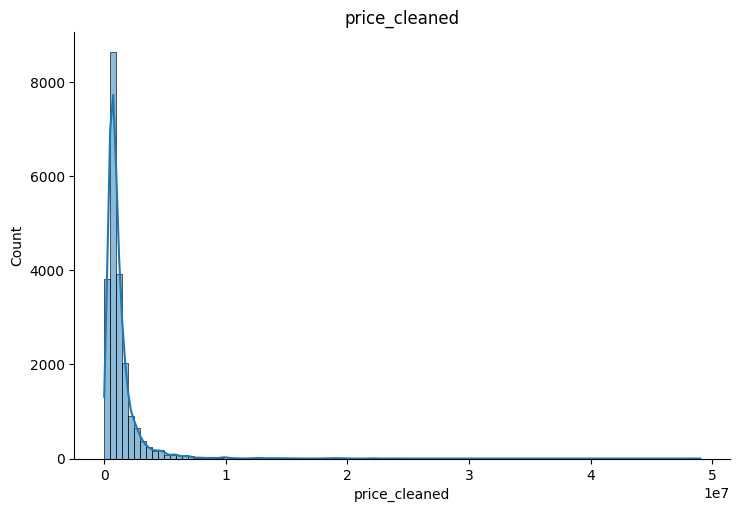

In [191]:
distplot(df, 'price_cleaned', 100)

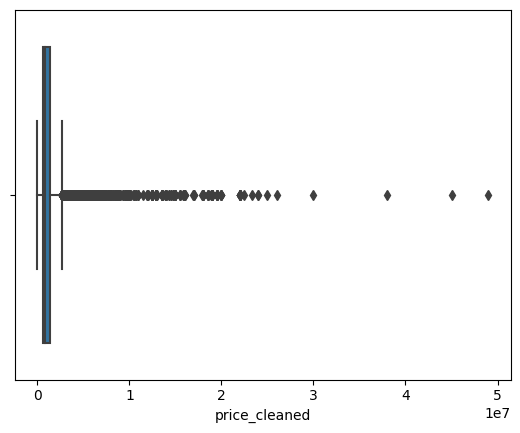

In [220]:
sns.boxplot(x=df['price_cleaned'])
plt.show()

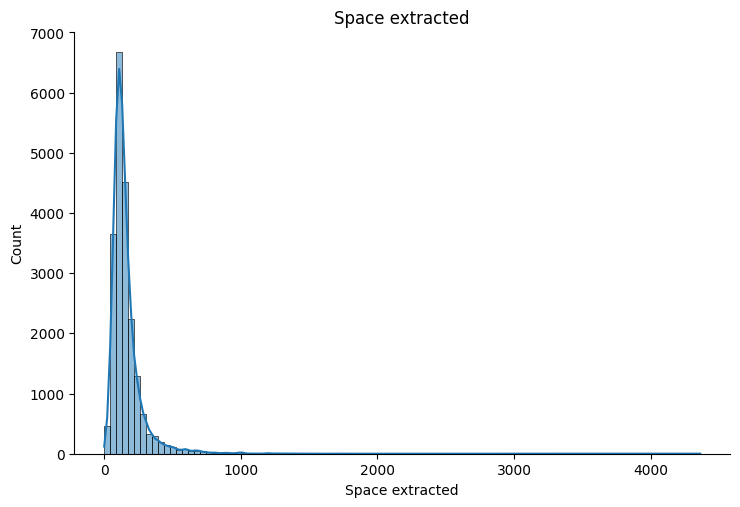

In [192]:
distplot(df, 'Space extracted', 100)

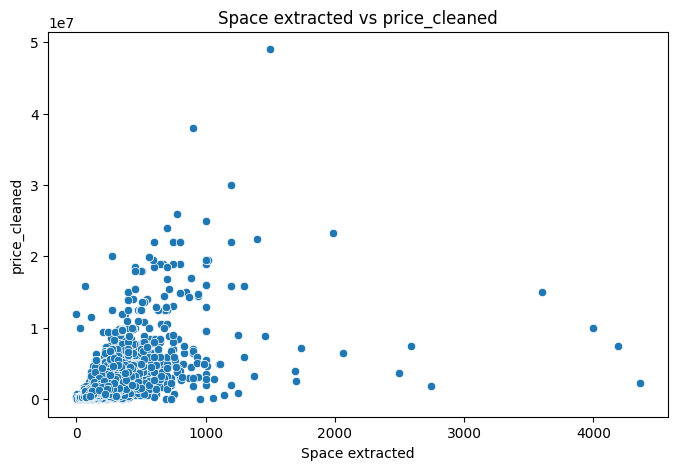

In [193]:
scatterplot(df, 'Space extracted', 'price_cleaned')

In [194]:
# amount of nan values in Space extracted
print(df['Space extracted'].isna().sum())

# amount of nan values in price cleaned
print(df['price_cleaned'].isna().sum())

1502
1015


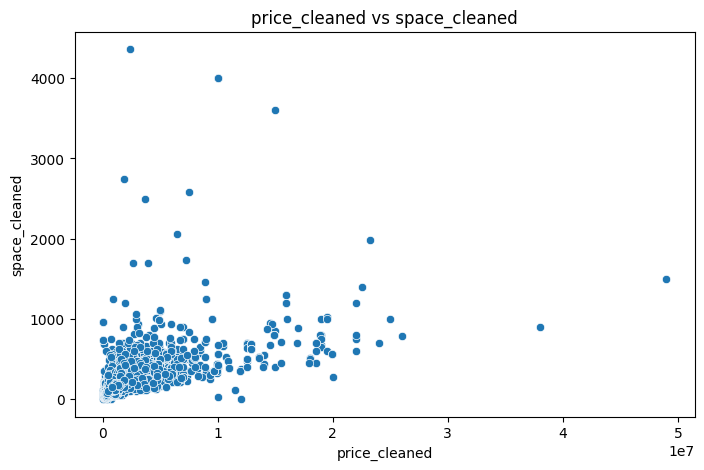

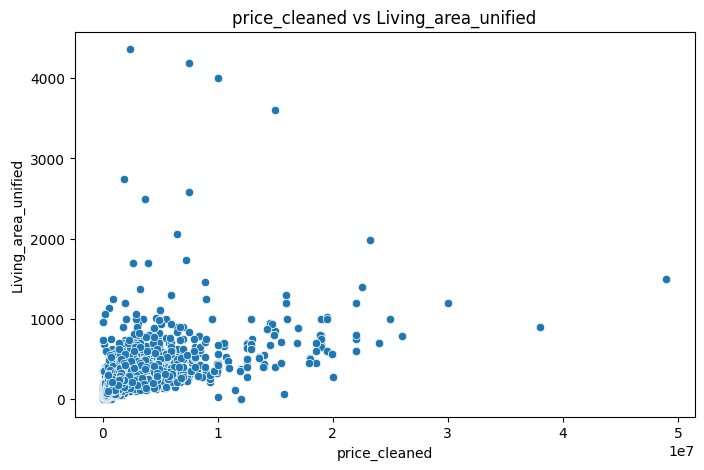

In [217]:
scatterplot(df, 'price_cleaned', 'space_cleaned')
scatterplot(df, 'price_cleaned', 'Living_area_unified')

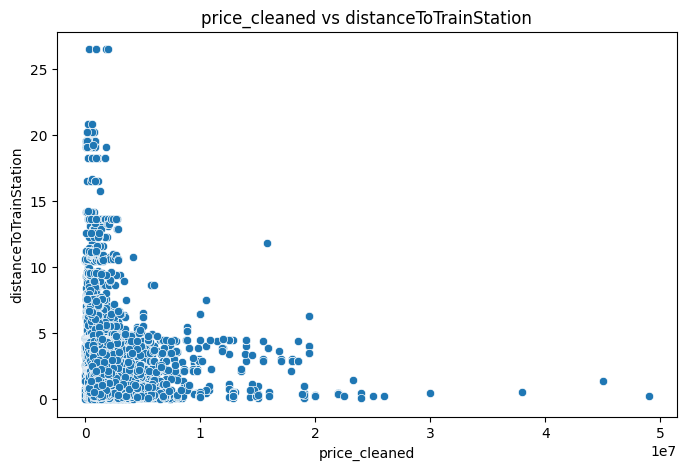

In [222]:
scatterplot(df, 'price_cleaned', 'distanceToTrainStation')

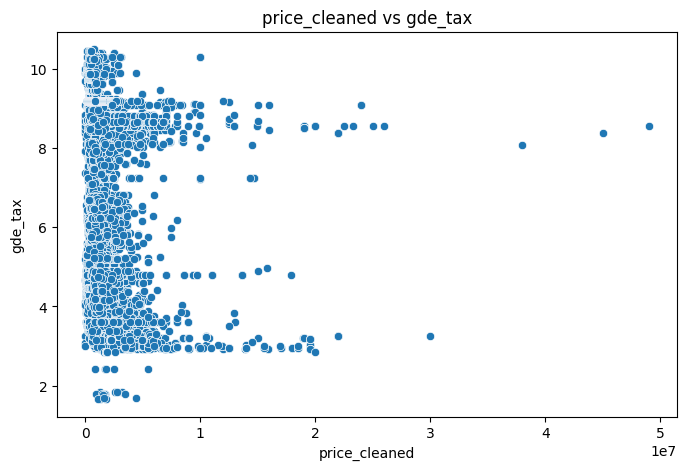

In [232]:
scatterplot(df, 'price_cleaned', 'gde_tax')

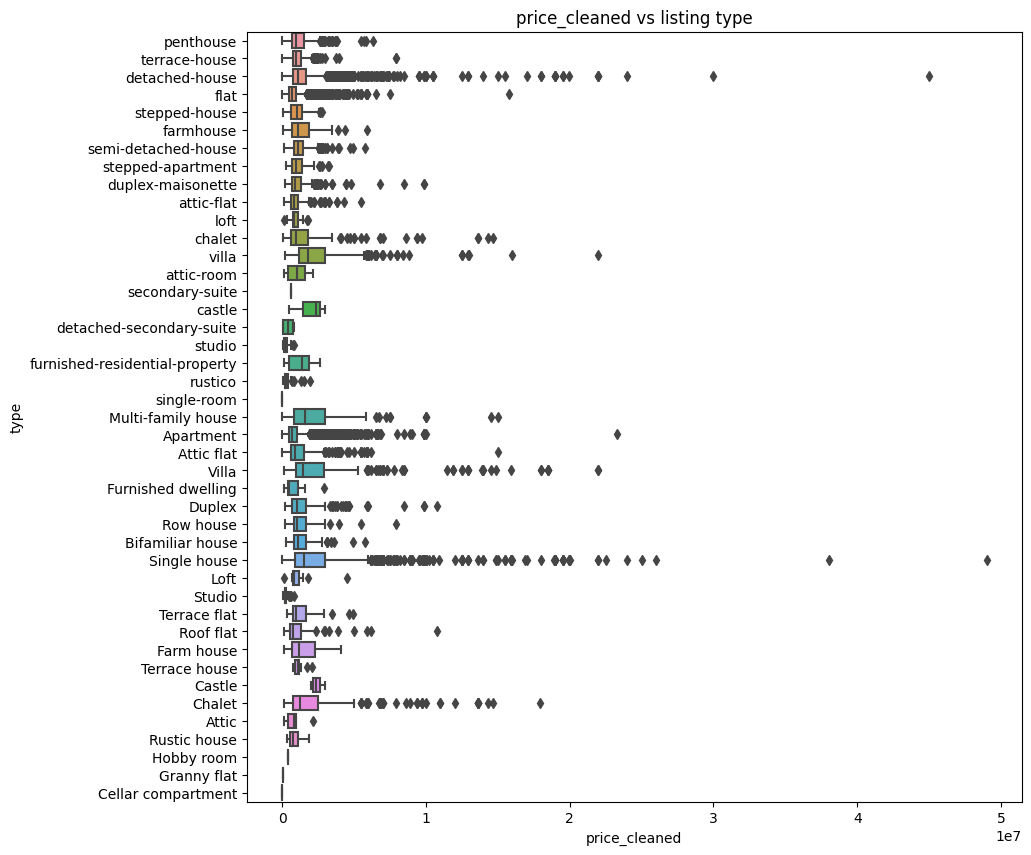

In [221]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='price_cleaned', y='type')
plt.title('price_cleaned vs listing type')
plt.show()

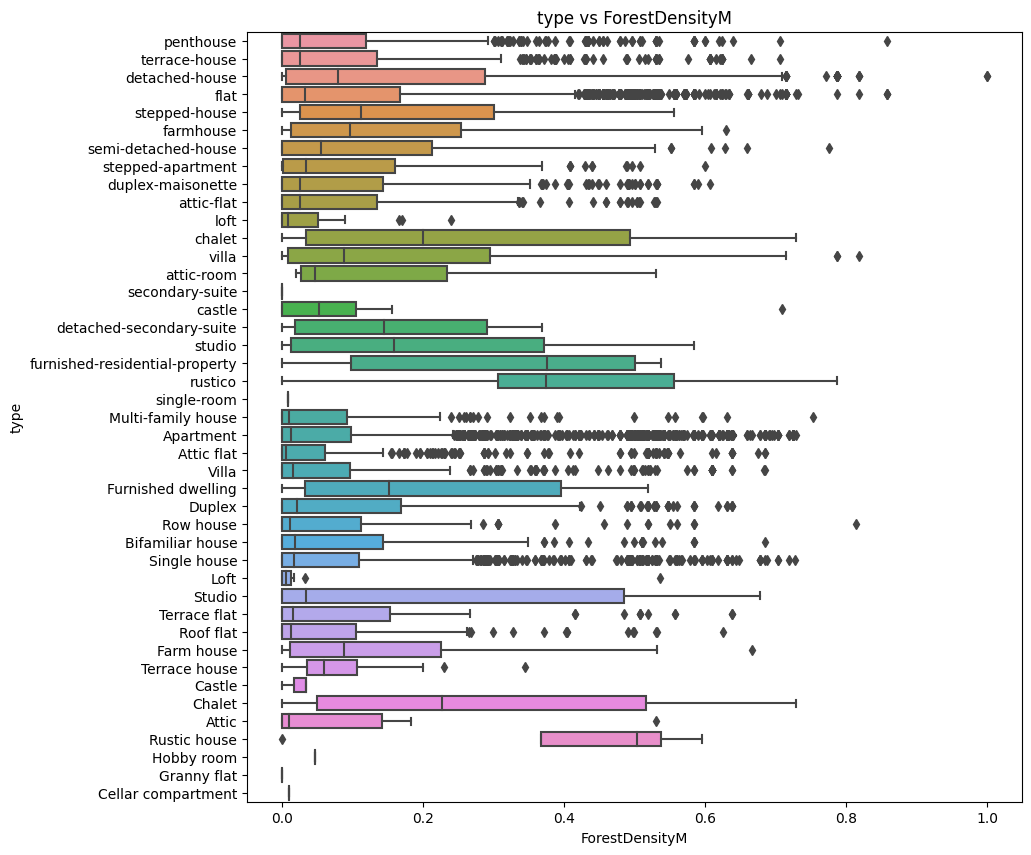

In [230]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='ForestDensityM', y='type')
plt.title('type vs ForestDensityM')
plt.show()

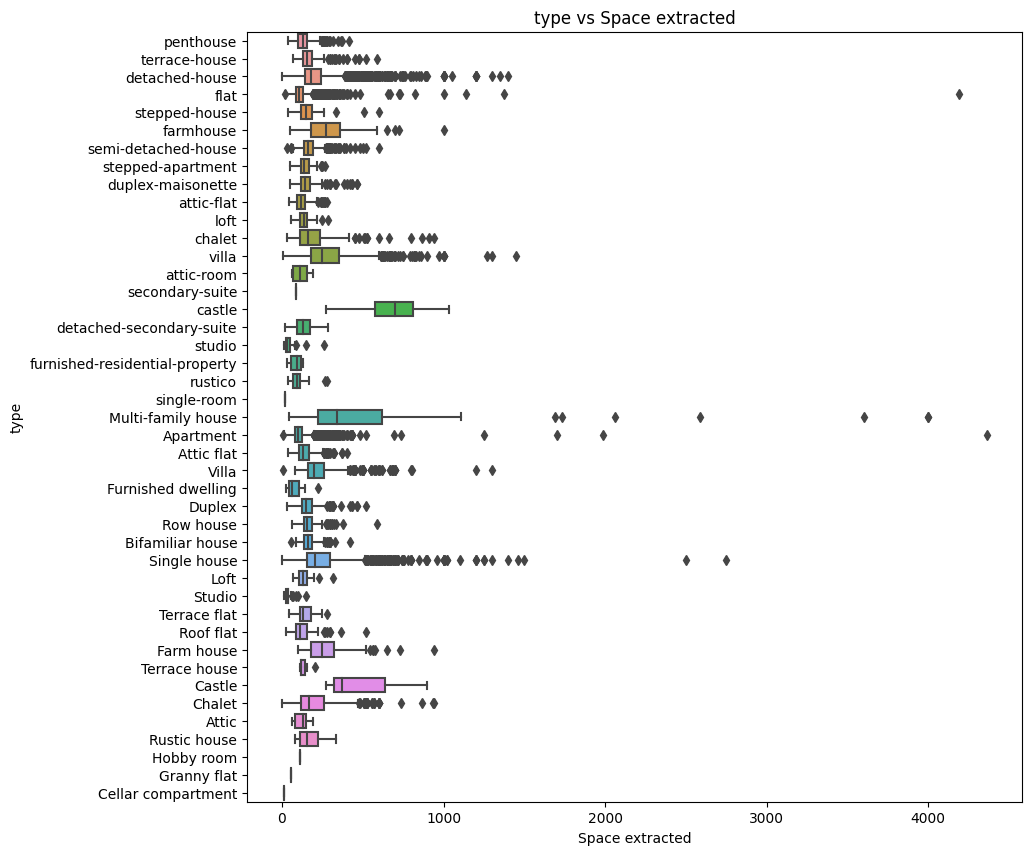

In [228]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='Space extracted', y='type')
plt.title('type vs Space extracted')
plt.show()

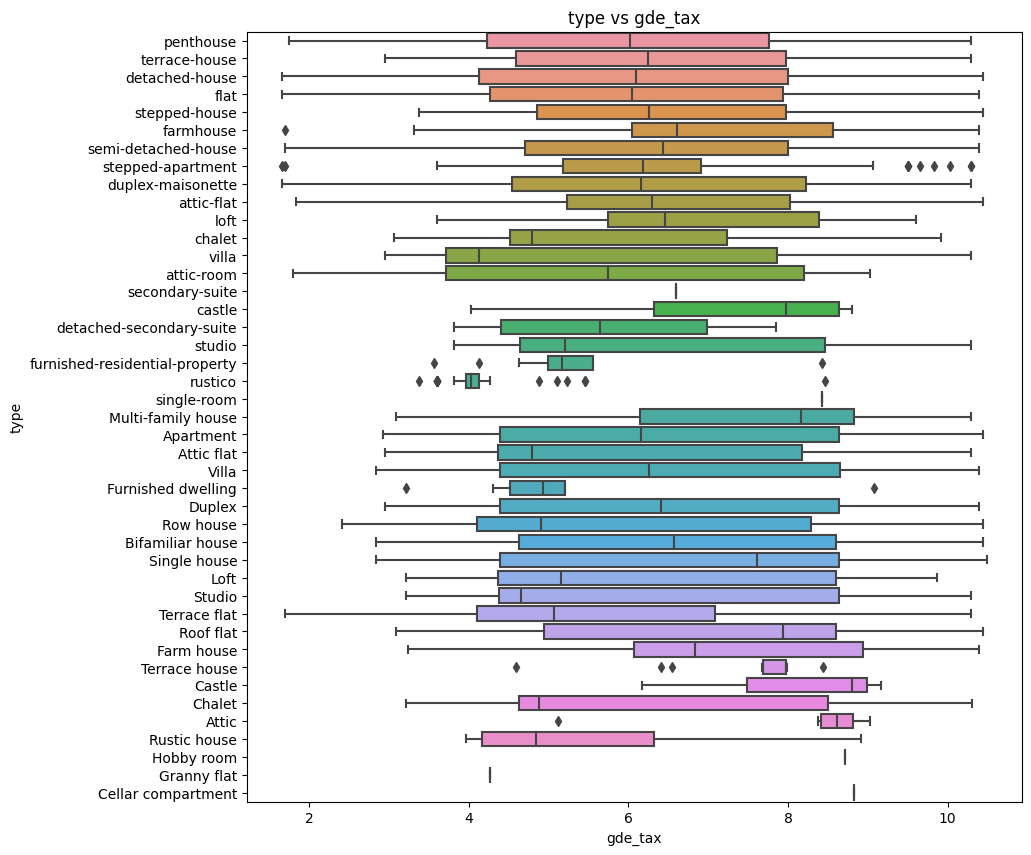

In [229]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='gde_tax', y='type')
plt.title('type vs gde_tax')
plt.show()

warum sind Villas so billig?

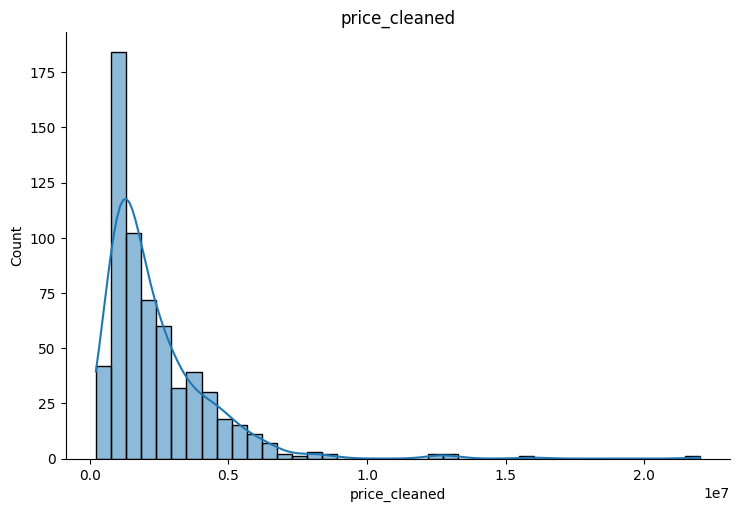

In [197]:
distplot(df[df['type'] == 'villa'], 'price_cleaned', 40)

In [198]:
# amount of villa listings count
print(df[df['type'] == 'villa']['price_cleaned'].count())

# missing values from type villa
print(df[df['type'] == 'villa']['price_cleaned'].isna().sum())

626
92


locality count

In [199]:
df_locality_count = df.groupby('Locality')['Locality'].count().sort_values(ascending=False)
df_locality_count = df_locality_count.reset_index(name='count')

cities = ["Zürich", "Aarau", "Kloten", "Lugano", "Bern", "Basel", "Horgen"]

df_locality_count[df_locality_count["Locality"].isin(cities)]

,Locality,count
40,Lugano,64
61,Basel,53
69,Bern,50
290,Aarau,22
317,Horgen,20
768,Kloten,7
851,Zürich,6


so wenig in Zürich?

korrelationen

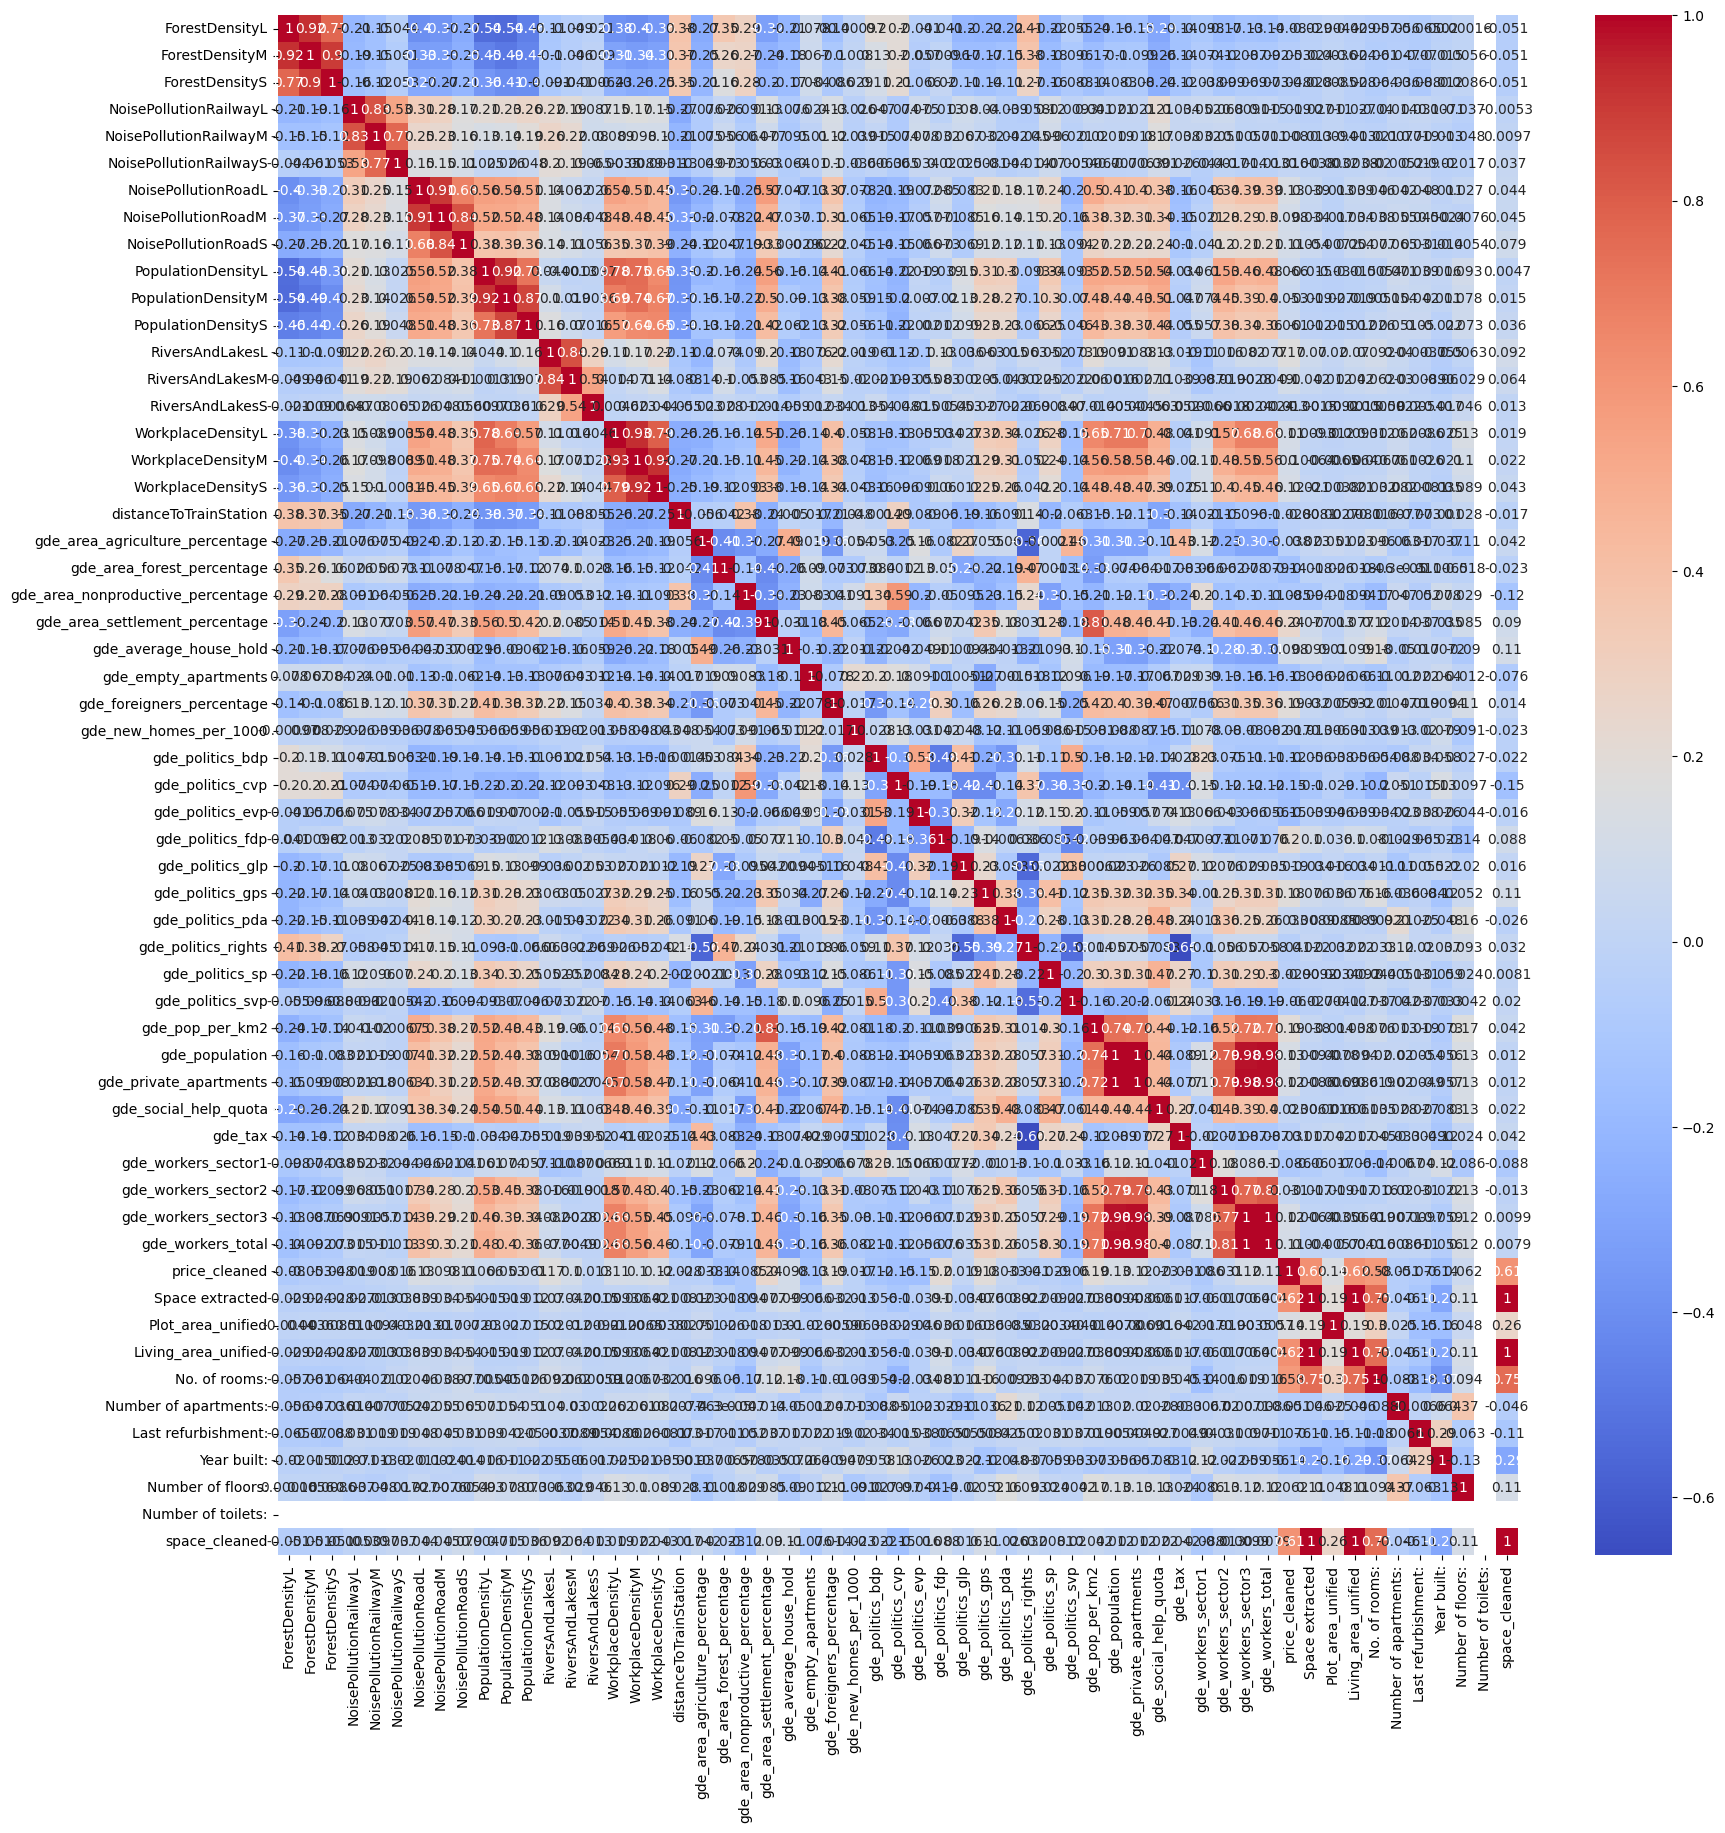

In [213]:
# get numeric columns
df_numeric = df.select_dtypes(include=np.number)

# remove lat, lon, index, Latitude, Longitude, Zip, plz_parsed, plz
df_numeric = df_numeric.drop(['lat', 'lon', 'index', 'Latitude', 'Longitude', 'Zip', 'plz_parsed', 'plz'], axis=1)

# correlation matrix
corr = df_numeric.corr()

# plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()